In [234]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, x_test, Y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

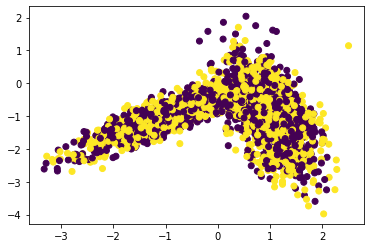

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

#group1_ind=frange(0,int(len(x_train)/3))
#group1_ind=[]
#group2_ind=[]
group3_ind=[]
group1_ind.extend([i for i in range(0,int(len(x_train)/3))])
print(group1_ind)
group2_ind.extend([i for i in range(int(len(x_train)/3),int(len(x_train)-len(x_train)/3))])
group3_ind.extend([i for i in range(int(len(x_train))-int(len(x_train)/3),len(x_train))])
#group2_ind=range(int(len(x_train)/3),int(len(x_train)-len(x_train)/3))
#group3_ind=range(int(len(x_train))-int(len(x_train)/3,len(x_train)))

print(group2_ind)
print(group3_ind)
#print(group2_ind)

In [236]:
def data_preparation(x_train):
    group1_ind=[]
    group2_ind=[]
    group3_ind=[]
    group1_ind.extend([i for i in range(0,int(len(x_train)/3))])
    group2_ind.extend([i for i in range(int(len(x_train)/3),int(len(x_train)-len(x_train)/3))])
    group3_ind.extend([i for i in range(int(len(x_train))-int(len(x_train)/3),len(x_train))])
    #print(group1_ind)
    #print(group2_ind)
    #print(group3_ind)

    orig=[0,1,2]
    temp=[]
    for i in range(0,3):

        for j in range(i+1,3):
            l=[] 
            if(j<3):
                l.append(i)
                l.append(j)
                #print(l)
                t=list(set(orig)-set(l))
               # print(t[0])
                l.append(t[0])
            temp.append(l)
        #print(temp)
    #print(temp) 
    data_=[group1_ind,group2_ind,group3_ind]
    final_data=[]
    for i in range(0,len(temp)):
        temp1=[]
        for j in range(0,len(temp)):
            #print(temp[i][j])
            temp1.append(data_[temp[i][j]])
        final_data.append(temp1) 
    return final_data



In [237]:

    #print(final_data)

In [238]:
def Random_Search_CV(final_data,x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = [] 
    

    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        for i in range(0,folds):
            test_ind=[]
            tr_indx=[]
            tr_indx.append(final_data[i][0])
            tr_indx.append(final_data[i][1])

            tr_indx=sum(tr_indx, [])
            #print(tr_indx)
            test_ind.append(final_data[i][2])
            #print(test_ind)
            X_train = x_train[tr_indx]
            Y_train = y_train[tr_indx]
            X_test  = x_train[test_ind]
            Y_test  = y_train[test_ind]
           # print(X_train.shape)
           # print(Y_train.shape)
            #print(X_test.shape)
            #print(Y_test.shape)
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores
    

In [239]:
import random
params_range=random.sample(range(1, 50), 10)
folds = 3
classifier = KNeighborsClassifier()
final_data=data_preparation(x_train)
trainscores,testscores = Random_Search_CV(final_data,X_train, y_train, classifier, params_range, folds)
 

100%|██████████| 11/11 [00:05<00:00,  1.99it/s]


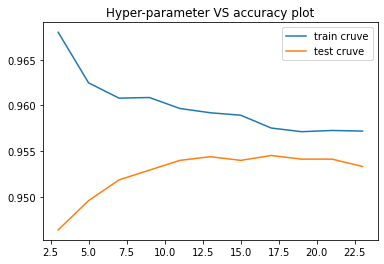

In [240]:
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [241]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()



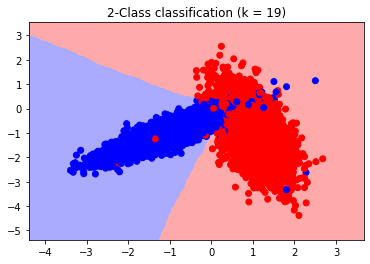

In [242]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, classifier)

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>